# Vattenfall Data
The dataset from Vattenfall represents information associated with failuring main components in wind turbines (WT) such as 
main gearbox, transformer, generator, main bearing, blade. 

The dataset contains approximately 450 failure events, where each event is a failure in a wind turbine main component. 
In addition to the information on which main component failed, there are additional information on e.g. which wind farm, onshore/offshore, component types, etc. 

An analysis of this dataset might include visualizations of relevant information for describing the fail-uring of each of the main components, e.g. how often does it happen, is there any structure in the data, which might support predicting the time for the next failure? 

Further questions might relate to possibilities for relations between failures of the main components. 


## Step 1: Loading data

In [3]:
# Let's start with importing pandas
import pandas as pd

In [4]:
# Loading the first and second sheet of our data in Excel
sheet_1 = pd.read_excel("Vattenfall_-_Main_Component_Exchange_Database.xlsx", sheet_name='DATABASE')
sheet_2 = pd.read_excel("Vattenfall_-_Main_Component_Exchange_Database.xlsx", sheet_name='Turbine Dat')


In [5]:
# Looking at Sheet_1
sheet_1.head()

,Park Type,Wind farm,Turbine Platform,Turbine,Component Failed,Outage cause,Material number,Failed Component Serial number,New Component Serial number,Failure Mode,...,Alarm code 11,Alarm code 12,Alarm code 13,Alarm code 14,Alarm code 15,Alarm code 16,Alarm code 17,Alarm code 18,Alarm code 19,Alarm code 20
0,Onshore,Jänschwalde,V90-2MW,GJW001,Gearbox,NaN,NaN,NaN,"Winergy, Typ PEAB4435, Nr. 4805340-0040-1",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Onshore,Jänschwalde,V90-2MW,GJW001,Transformer,NaN,NaN,NaN,"SGB, Typ DTTHIL 1600/20, Nr. 217486",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Onshore,Jänschwalde,V90-2MW,GJW002,Transformer,NaN,NaN,NaN,"SGB, Typ DTTHIL 1600/20, Nr. 216168",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Offshore,Egmond aan Zee,V90-3MW,NEZ006,Generator,NaN,NaN,601097 TD 03,601259 UH 11,Serial Defect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Offshore,Egmond aan Zee,V90-3MW,NEZ007,Generator,NaN,NaN,600970 TC 14,601259 UE 10,Serial Defect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Looking at Sheet_2
sheet_2.head()

,v,Park,Turbine,Country,Manufacturer,Turbine Type,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,Commision Year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Offshore,DanTysk,GDT001,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.067577,7.174491,2014,NaN,NaN,NaN,NaN
1,Offshore,DanTysk,GDT002,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.075621,7.175127,2014,NaN,NaN,NaN,NaN
2,Offshore,DanTysk,GDT003,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.083024,7.182107,2014,NaN,NaN,NaN,NaN
3,Offshore,DanTysk,GDT004,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.093698,7.170464,2014,NaN,NaN,NaN,NaN
4,Offshore,DanTysk,GDT005,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.103260,7.170372,2014,NaN,NaN,NaN,NaN


## Step 2: EDA

In [7]:
# let's import seaborn and plot some visualizations 
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})


In [8]:
# Let's start with creating a distplot for Hub height
sns.distplot(sheet_2['Hub Height'], bins = 10)

<AxesSubplot:xlabel='Hub Height', ylabel='Density'>

#### Maximum range of heights range between 60 to 100

In [9]:
# Let's create a distplot for Commision Year as well
sns.distplot(sheet_2['Commision Year'], bins = 10)

<AxesSubplot:xlabel='Commision Year', ylabel='Density'>

#### Maximum range of years range between 2010  to 2020

In [10]:
# Let's create a distplot for Rotor Diameter now
sns.distplot(sheet_2['Rotor Diameter'], bins = 10)

<AxesSubplot:xlabel='Rotor Diameter', ylabel='Density'>

#### Maximum range of Rotor Diameter range between 75  to 125

In [11]:
# Pairplots will also be able to give a good idea about the data
sns.pairplot(sheet_2)

#### We can see a strong positive relationship between Rotor Diameter and Hub Height

In [12]:
# Barplots can give useful information too
sns.barplot(x = sheet_2['Country'], y = sheet_2['Hub Height'])

<AxesSubplot:xlabel='Country', ylabel='Hub Height'>

#### We can clearly see GE leading here when it comes to Hub Height

In [13]:
# Lets create a barplot for Hub heights in onshore and offshore
sns.barplot(x = sheet_2['v'], y = sheet_2['Hub Height'])

<AxesSubplot:xlabel='v', ylabel='Hub Height'>

#### They seem to have similar heights

In [14]:
# A heatmap can solve many relationships lets have a look
sns.heatmap(sheet_2.corr(), annot = True, cmap = 'viridis')

<AxesSubplot:>

#### We can see a coorealtion between Hub height and Rotor Diameter, also in Rotor Diameter and commision Year

In [15]:
# Lets plot some scatter plots now
sns.scatterplot(x=sheet_2['Rotor Diameter'], y=sheet_2['Hub Height']);

#### Clearly we can see a strong positive relationship between Rotor Diameter and Hub Height

In [16]:
sns.scatterplot(x=sheet_2['Rotor Diameter'], y=sheet_2['Installed Power']);

#### Clearly we can see a strong positive relationship between Rotor Diameter and Installed Power

In [17]:
sns.scatterplot(x=sheet_2['Rotor Diameter'], y=sheet_2['Commision Year']);

#### Another strong positive relationship between Rotor Diameter and Commission Year

In [18]:
#Lets plot some box plots now
sns.boxplot(x=sheet_2['Hub Height'])

<AxesSubplot:xlabel='Hub Height', ylabel='Hub Height'>

#### Hub Height values lies mostly between 70 to 98

In [19]:
sns.boxplot(x=sheet_2['Rotor Diameter'])

<AxesSubplot:xlabel='Rotor Diameter', ylabel='Hub Height'>

#### Rotor Diameter values lies mostly between 85 to 120

In [20]:
sns.boxplot(x=sheet_2['Commision Year'])

<AxesSubplot:xlabel='Commision Year', ylabel='Hub Height'>

#### Commision Year values lies mostly between 2006 to 2018

In [21]:
sns.violinplot(x='Country', y="Hub Height", data=sheet_2)

<AxesSubplot:xlabel='Country', ylabel='Hub Height'>

#### Clearly NL has larger Hub heights

In [22]:
#Let's plot the top 10 Rotor Diameter Values
sns.countplot(x='Rotor Diameter',data=sheet_2 ,order=pd.value_counts(sheet_2['Rotor Diameter']).iloc[:10].index)

<AxesSubplot:xlabel='Rotor Diameter', ylabel='count'>

### Step 3 : Data Preprocessing

In [23]:
# Let's start with dropping na values of Component Exchange Date
sheet_1.dropna(subset = ["Component Exchange Date"], inplace=True)

In [24]:
# Creating a function to calculate Missing Value Percentage
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [25]:
# Applying the function
missing_values_table(sheet_1)

Your selected dataframe has 42 columns.
There are 33 columns that have missing values.


,Missing Values,% of Total Values
Alarm code 20,449,100.0
Alarm code 19,449,100.0
Alarm code 18,448,99.8
Alarm code 17,447,99.6
Alarm code 16,447,99.6
Alarm code 15,447,99.6
Alarm code 14,447,99.6
Alarm code 13,445,99.1
Alarm code 12,445,99.1
Alarm code 11,445,99.1


Great! we still have a lot of missing values to deal with

In [26]:
sheet_1.shape

(449, 42)

Deleting the columns not relevant for analyis:

In [27]:
sheet_1.drop(['Jackup Cost', 'Other Project Cost','Material number','Failure Mode',
                  'Estimated Lost Production', 'Estimated Lost Revenue', 'Work Order',
                  'Material number','Jackup Call-off Date','Turbine start date',
       'Failed Component Serial number', 'New Component Serial number',
       'Main Component Cost', 'Jackup Cost', 'Other Project Cost',
       'Jackup vessel', 'Turbine Stopp Date',
       'Jackup vessel','Alarm code 3',
       'Alarm code 4', 'Alarm code 5', 'Alarm code 6', 'Alarm code 7',
       'Alarm code 8', 'Alarm code 9', 'Alarm code 10', 'Alarm code 11',
       'Alarm code 12', 'Alarm code 13', 'Alarm code 14', 'Alarm code 15',
       'Alarm code 16', 'Alarm code 17', 'Alarm code 18', 'Alarm code 19',
       'Alarm code 20'], axis='columns', inplace=True)

In [28]:
# Lets's look for null values again
missing_values_table(sheet_1)

Your selected dataframe has 10 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Alarm code 2,395,88.0
Outage cause,364,81.1
Component Commisioning Date,360,80.2
Alarm code 1,338,75.3
Turbine,13,2.9


In [29]:
# let's fill the Aarm code 1 NULL values with 0
sheet_1['Alarm code 1'] = sheet_1['Alarm code 1'].fillna(value=0)

In [30]:
# Let's create a function to replace values with 1 and null values with 0
def add_one(x):
    if x > 0:
        return 1
    else:
        return 0

In [31]:
# Applying the function 
sheet_1['Alarm code 2']=sheet_1['Alarm code 2'].apply(add_one)

In [32]:
#looks like we acheived what we wanted
sheet_1['Alarm code 2'].value_counts()

0    395
1     54
Name: Alarm code 2, dtype: int64

In [33]:
# Let's do the same for Alarm code 1
sheet_1['Alarm code 1']=sheet_1['Alarm code 1'].apply(add_one)

In [34]:
# Well Done
sheet_1['Alarm code 1'].value_counts()

0    338
1    111
Name: Alarm code 1, dtype: int64

In [35]:
#Let's create a function to replace null values with unknown in column outage cause
import math
def add_on(x):
    if pd.isna(x) == True:
        return "unknown"
    else:
        return x

In [36]:
# Applying the function 
sheet_1['Outage cause']=sheet_1['Outage cause'].apply(add_on)

In [37]:
# Applying the function again,because we love it
missing_values_table(sheet_1)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Component Commisioning Date,360,80.2
Turbine,13,2.9


In [38]:
# Let's change Component Commisioning Date and Component Exchange Date column to Datetime to manipulate it
sheet_1['Component Commisioning Date'] = pd.to_datetime(sheet_1['Component Commisioning Date'])
sheet_1['Component Exchange Date'] = pd.to_datetime(sheet_1['Component Exchange Date'])

In [39]:
sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Park Type                    449 non-null    object        
 1   Wind farm                    449 non-null    object        
 2   Turbine Platform             449 non-null    object        
 3   Turbine                      436 non-null    object        
 4   Component Failed             449 non-null    object        
 5   Outage cause                 449 non-null    object        
 6   Component Commisioning Date  89 non-null     datetime64[ns]
 7   Component Exchange Date      449 non-null    datetime64[ns]
 8   Alarm code 1                 449 non-null    int64         
 9   Alarm code 2                 449 non-null    int64         
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 38.6+ KB


## Preprocessing Sheet_2

In [40]:
# Applying the same function to sheet 2
missing_values_table(sheet_2)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 12,1236,100.0
Unnamed: 13,1236,100.0
Unnamed: 14,1236,100.0
Unnamed: 15,1236,100.0
Hub Height,23,1.9
Rotor Diameter,15,1.2


Since there are missing comissioning dates from Sheet_1, we can find them from commision year of sheet 2 and Assume date and month to be 01  Jan.

In [41]:
sheet_2['Day'] = 1
sheet_2['Month'] = 1


In [42]:
cols=["Commision Year","Month","Day"]
sheet_2['date'] = sheet_2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [43]:
sheet_2

,v,Park,Turbine,Country,Manufacturer,Turbine Type,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,Commision Year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Day,Month,date
0,Offshore,DanTysk,GDT001,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.067577,7.174491,2014,NaN,NaN,NaN,NaN,1,1,2014-1-1
1,Offshore,DanTysk,GDT002,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.075621,7.175127,2014,NaN,NaN,NaN,NaN,1,1,2014-1-1
2,Offshore,DanTysk,GDT003,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.083024,7.182107,2014,NaN,NaN,NaN,NaN,1,1,2014-1-1
3,Offshore,DanTysk,GDT004,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.093698,7.170464,2014,NaN,NaN,NaN,NaN,1,1,2014-1-1
4,Offshore,DanTysk,GDT005,GE,Siemens,Siemens-3600KW,120.0,88.0,3600,55.103260,7.170372,2014,NaN,NaN,NaN,NaN,1,1,2014-1-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,Onshore,Tjæreborg Enge,WTJ315,DK,NEGMicon,NM80/2750,80.0,60.0,2750,55.448893,8.579445,1996,NaN,NaN,NaN,NaN,1,1,1996-1-1
1232,Onshore,Tjæreborg Enge,WTJ316,DK,NEGMicon,NM80/2750,80.0,60.0,2750,55.447734,8.584944,1996,NaN,NaN,NaN,NaN,1,1,1996-1-1
1233,Onshore,Tjæreborg Enge,WTJ317,DK,NEGMicon,NM80/2750,80.0,60.0,2750,55.446151,8.592327,1996,NaN,NaN,NaN,NaN,1,1,1996-1-1
1234,Onshore,Tjæreborg Enge,WTJ318,DK,NEGMicon,NM80/2750,80.0,60.0,2750,55.445044,8.597492,1996,NaN,NaN,NaN,NaN,1,1,1996-1-1


In [44]:
# Changing type to datetime
sheet_2['date'] = pd.to_datetime(sheet_2['date'])

In [45]:
sheet_2['date']

0      2014-01-01
1      2014-01-01
2      2014-01-01
3      2014-01-01
4      2014-01-01
          ...    
1231   1996-01-01
1232   1996-01-01
1233   1996-01-01
1234   1996-01-01
1235   1996-01-01
Name: date, Length: 1236, dtype: datetime64[ns]

We have new date column, so we can drop the columns day, month and year. Also the other not so useful columns can be deleted.

In [46]:
sheet_2.drop(['Day', 'Month', 'Commision Year'], axis='columns', inplace=True)

In [47]:
sheet_1.shape

(449, 10)

In [48]:
sheet_2.shape

(1236, 16)

The missing comission date from sheet_1 can be found from sheet_2 by looking at farm it belongs to. 

In [49]:
sheet_1.loc[(sheet_1['Wind farm'] == 'Kentish Flats'),'Component Commisioning Date']= '2005-01-01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Princess Alexia'),'Component Commisioning Date']= '2013-01-01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Tjæreborg Enge'),'Component Commisioning Date']= '1996-01-01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Stor Rotliden'),'Component Commisioning Date']= '2010-01-01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Horns Rev 1'),'Component Commisioning Date']= '2002-01-01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Östra Herrestad'),'Component Commisioning Date']= '2010-01-01'

All the turbines belonging to the following farms have same rest of the attributes such as 'Manufacturer', 'Turbine Type',
       'Rotor Diameter', 'Hub Height', 'Installed Power', 'Latitute',
       'Longitude': Hence these turbines can be given a dummy name as follows to map in order to  sheet_2

In [50]:
sheet_1.loc[(sheet_1['Wind farm'] == 'Nørrekær Enge'),'Turbine']= 'WNE001'
sheet_1.loc[(sheet_1['Wind farm'] == 'Kentish Flats'),'Turbine']= 'UKFA01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Princess Alexia'),'Turbine']= 'NZLN01'
sheet_1.loc[(sheet_1['Wind farm'] == 'Stor Rotliden'),'Turbine']= 'SRLA01'

Now we can join the sheet 1 and sheet 2 on the Turbine column

In [51]:
data = sheet_1.merge(sheet_2, on='Turbine', how="left")

In [52]:
data.shape

(449, 25)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Park Type                    449 non-null    object        
 1   Wind farm                    449 non-null    object        
 2   Turbine Platform             449 non-null    object        
 3   Turbine                      446 non-null    object        
 4   Component Failed             449 non-null    object        
 5   Outage cause                 449 non-null    object        
 6   Component Commisioning Date  295 non-null    object        
 7   Component Exchange Date      449 non-null    datetime64[ns]
 8   Alarm code 1                 449 non-null    int64         
 9   Alarm code 2                 449 non-null    int64         
 10  v                            432 non-null    object        
 11  Park                         432 non-null    

Replacing the NaN in Comissioning Date missing values referring to its Wind Farm. 

In [54]:
missing_values_table(sheet_1)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Component Commisioning Date,154,34.3
Turbine,3,0.7


In [55]:
data.isnull().sum()

Park Type                        0
Wind farm                        0
Turbine Platform                 0
Turbine                          3
Component Failed                 0
Outage cause                     0
Component Commisioning Date    154
Component Exchange Date          0
Alarm code 1                     0
Alarm code 2                     0
v                               17
Park                            17
Country                         17
Manufacturer                    17
Turbine Type                    17
Rotor Diameter                  17
Hub Height                      17
Installed Power                 17
Latitute                        17
Longitude                       17
Unnamed: 12                    449
Unnamed: 13                    449
Unnamed: 14                    449
Unnamed: 15                    449
date                            17
dtype: int64

In [56]:
data['Component Commisioning Date'] = pd.to_datetime(data['Component Commisioning Date'])

In [57]:
missing_values_table(data)

Your selected dataframe has 25 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 15,449,100.0
Unnamed: 14,449,100.0
Unnamed: 13,449,100.0
Unnamed: 12,449,100.0
Component Commisioning Date,154,34.3
Hub Height,17,3.8
Installed Power,17,3.8
Longitude,17,3.8
Latitute,17,3.8
date,17,3.8


In [58]:
#Let's see what we have acheived
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Park Type                    449 non-null    object        
 1   Wind farm                    449 non-null    object        
 2   Turbine Platform             449 non-null    object        
 3   Turbine                      446 non-null    object        
 4   Component Failed             449 non-null    object        
 5   Outage cause                 449 non-null    object        
 6   Component Commisioning Date  295 non-null    datetime64[ns]
 7   Component Exchange Date      449 non-null    datetime64[ns]
 8   Alarm code 1                 449 non-null    int64         
 9   Alarm code 2                 449 non-null    int64         
 10  v                            432 non-null    object        
 11  Park                         432 non-null    

In [59]:
# Filling the missing values of Component Commisioning Date with Date
data['Component Commisioning Date'] = data['Component Commisioning Date'].fillna(data['date'])

In [60]:
# Removing missing values of Country Column
data_prepared = data[data['Country'].notna()]

In [61]:
# Finally we got over all those missing values
missing_values_table(data_prepared)

Your selected dataframe has 25 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 12,432,100.0
Unnamed: 13,432,100.0
Unnamed: 14,432,100.0
Unnamed: 15,432,100.0


In [62]:
data_prepared.shape

(432, 25)

In [63]:
# Columns we need to work on
data_prepared.columns

Index(['Park Type', 'Wind farm', 'Turbine Platform', 'Turbine',
       'Component Failed', 'Outage cause', 'Component Commisioning Date',
       'Component Exchange Date', 'Alarm code 1', 'Alarm code 2', 'v', 'Park',
       'Country', 'Manufacturer', 'Turbine Type', 'Rotor Diameter',
       'Hub Height', 'Installed Power', 'Latitute', 'Longitude', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'date'],
      dtype='object')

In [64]:
# Dropping Columns we no longer need
data_prepared.drop(['Wind farm', 'v', 'date', 'Turbine Type'], axis='columns', inplace=True)

In [65]:
# Final Data 
data_prepared

,Park Type,Turbine Platform,Turbine,Component Failed,Outage cause,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Park,...,Manufacturer,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Onshore,V90-2MW,GJW001,Gearbox,unknown,2005-02-08,2005-06-05,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
1,Onshore,V90-2MW,GJW001,Transformer,unknown,2005-02-08,2006-04-27,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
2,Onshore,V90-2MW,GJW002,Transformer,unknown,2005-12-31,2006-05-10,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.791223,14.481372,NaN,NaN,NaN,NaN
3,Offshore,V90-3MW,NEZ006,Generator,unknown,2006-01-01,2008-02-09,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.600806,4.403694,NaN,NaN,NaN,NaN
4,Offshore,V90-3MW,NEZ007,Generator,unknown,2006-01-01,2008-02-10,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.605306,4.397472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Offshore,"SWT-3,6MW",GDT015,Gearbox,Forced,2014-01-01,2020-11-26,1,1,DanTysk,...,Siemens,120.0,88.0,3600.0,55.176795,7.180400,NaN,NaN,NaN,NaN
445,Offshore,"SWT-3,6MW",GDT071,Generator,Forced,2014-01-01,2020-11-27,1,1,DanTysk,...,Siemens,120.0,88.0,3600.0,55.145877,7.187002,NaN,NaN,NaN,NaN
446,Offshore,V90-3MW,UTHB09,Generator,Forced,2010-01-01,2020-12-05,1,1,Thanet,...,Vestas,90.0,70.0,3000.0,51.421371,1.619242,NaN,NaN,NaN,NaN
447,Offshore,"V164-8,0MW",WH3F07,Gearbox,Forced,2018-01-01,2021-01-30,1,1,Horns Rev 3,...,MHI Vestas,164.0,105.1,8300.0,55.668330,7.694160,NaN,NaN,NaN,NaN


In [66]:
# Let's save it as csv for future use
data_prepared.to_csv("Refined.csv")

## Step 4: EDA for our refined Data

In [67]:
# Importing Python3 necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Time to create some cool pie charts

In [68]:
Manufacturer_data = data_prepared['Manufacturer'].value_counts()

In [69]:
Country_data = data_prepared['Country'].value_counts()

In [70]:
Component_Failed_data = data_prepared['Component Failed'].value_counts()

In [71]:
Outage_cause_data = data_prepared['Outage cause'].value_counts()

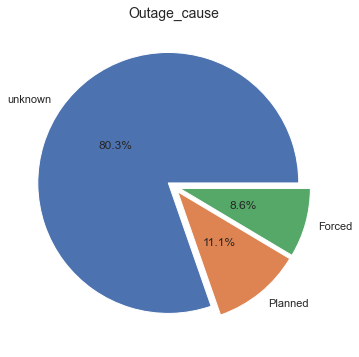

In [72]:
# Let's start with Outage_cause
pie, ax = plt.subplots(figsize=[10,6])
labels = Outage_cause_data.keys()
plt.pie(x=Outage_cause_data, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Outage_cause", fontsize=14);

Most of the Outage_cause is Unknown

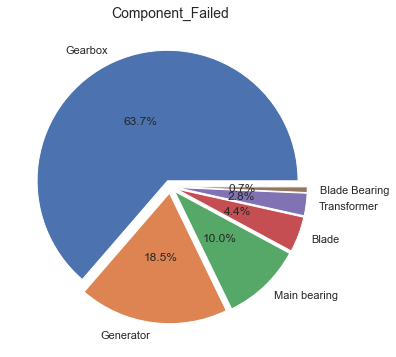

In [73]:
# Let's start with Outage_cause
pie, ax = plt.subplots(figsize=[10,6])
labels = Component_Failed_data.keys()
plt.pie(x=Component_Failed_data, autopct="%.1f%%", explode=[0.05]*6, labels=labels, pctdistance=0.5)
plt.title("Component_Failed", fontsize=14);

Gearbox is more prone to faliure

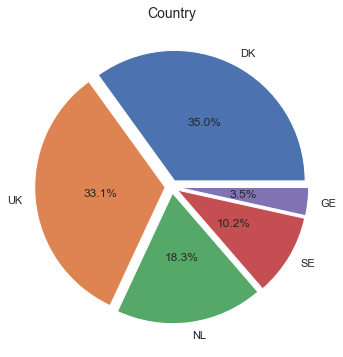

In [74]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = Country_data.keys()
plt.pie(x=Country_data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Country", fontsize=14);

DK leads by all means

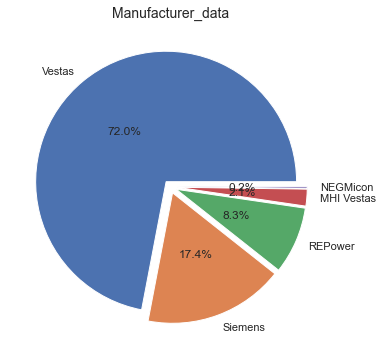

In [75]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = Manufacturer_data.keys()
plt.pie(x=Manufacturer_data, autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Manufacturer_data", fontsize=14);

Vestas is the largest Manufacturer

In [76]:
data_prepared

,Park Type,Turbine Platform,Turbine,Component Failed,Outage cause,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Park,...,Manufacturer,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Onshore,V90-2MW,GJW001,Gearbox,unknown,2005-02-08,2005-06-05,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
1,Onshore,V90-2MW,GJW001,Transformer,unknown,2005-02-08,2006-04-27,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
2,Onshore,V90-2MW,GJW002,Transformer,unknown,2005-12-31,2006-05-10,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.791223,14.481372,NaN,NaN,NaN,NaN
3,Offshore,V90-3MW,NEZ006,Generator,unknown,2006-01-01,2008-02-09,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.600806,4.403694,NaN,NaN,NaN,NaN
4,Offshore,V90-3MW,NEZ007,Generator,unknown,2006-01-01,2008-02-10,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.605306,4.397472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,Offshore,"SWT-3,6MW",GDT015,Gearbox,Forced,2014-01-01,2020-11-26,1,1,DanTysk,...,Siemens,120.0,88.0,3600.0,55.176795,7.180400,NaN,NaN,NaN,NaN
445,Offshore,"SWT-3,6MW",GDT071,Generator,Forced,2014-01-01,2020-11-27,1,1,DanTysk,...,Siemens,120.0,88.0,3600.0,55.145877,7.187002,NaN,NaN,NaN,NaN
446,Offshore,V90-3MW,UTHB09,Generator,Forced,2010-01-01,2020-12-05,1,1,Thanet,...,Vestas,90.0,70.0,3000.0,51.421371,1.619242,NaN,NaN,NaN,NaN
447,Offshore,"V164-8,0MW",WH3F07,Gearbox,Forced,2018-01-01,2021-01-30,1,1,Horns Rev 3,...,MHI Vestas,164.0,105.1,8300.0,55.668330,7.694160,NaN,NaN,NaN,NaN


In [77]:
# Looking at the head of our cleaned data
data_prepared.head()

,Park Type,Turbine Platform,Turbine,Component Failed,Outage cause,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Park,...,Manufacturer,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Onshore,V90-2MW,GJW001,Gearbox,unknown,2005-02-08,2005-06-05,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
1,Onshore,V90-2MW,GJW001,Transformer,unknown,2005-02-08,2006-04-27,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.789594,14.476311,NaN,NaN,NaN,NaN
2,Onshore,V90-2MW,GJW002,Transformer,unknown,2005-12-31,2006-05-10,0,0,Jänschwalde,...,Vestas,90.0,105.0,2000.0,51.791223,14.481372,NaN,NaN,NaN,NaN
3,Offshore,V90-3MW,NEZ006,Generator,unknown,2006-01-01,2008-02-09,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.600806,4.403694,NaN,NaN,NaN,NaN
4,Offshore,V90-3MW,NEZ007,Generator,unknown,2006-01-01,2008-02-10,0,0,Egmond aan Zee,...,Vestas,90.0,68.0,3000.0,52.605306,4.397472,NaN,NaN,NaN,NaN


In [78]:
# Gathering more info
data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 448
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Park Type                    432 non-null    object        
 1   Turbine Platform             432 non-null    object        
 2   Turbine                      432 non-null    object        
 3   Component Failed             432 non-null    object        
 4   Outage cause                 432 non-null    object        
 5   Component Commisioning Date  432 non-null    datetime64[ns]
 6   Component Exchange Date      432 non-null    datetime64[ns]
 7   Alarm code 1                 432 non-null    int64         
 8   Alarm code 2                 432 non-null    int64         
 9   Park                         432 non-null    object        
 10  Country                      432 non-null    object        
 11  Manufacturer                 432 non-null    

In [79]:
# Creating a New Column RUL 
data_prepared['RUL'] = (data_prepared['Component Exchange Date'] - data_prepared['Component Commisioning Date']).dt.days

In [78]:
# Looking for Null Values 
data_prepared.isnull().sum()

Park Type                      0
Turbine Platform               0
Turbine                        0
Component Failed               0
Outage cause                   0
Component Commisioning Date    0
Component Exchange Date        0
Alarm code 1                   0
Alarm code 2                   0
Park                           0
Country                        0
Manufacturer                   0
Rotor Diameter                 0
Hub Height                     0
Installed Power                0
Latitute                       0
Longitude                      0
RUL                            0
dtype: int64

In [79]:
# RUL successfully created
data_prepared['RUL'].head(20)

0      117
1      443
2      130
3      769
4      770
5      778
6      784
7      785
8      830
9      843
10     852
11     854
12     857
13     859
14     935
15     948
16    1352
17    1355
18    1357
19    1366
Name: RUL, dtype: int64

In [92]:
missing_values_table(data_prepared)

Your selected dataframe has 22 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 12,432,100.0
Unnamed: 13,432,100.0
Unnamed: 14,432,100.0
Unnamed: 15,432,100.0


In [93]:
data_prepared.drop(['Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'
       ], axis='columns', inplace=True)

In [95]:
missing_values_table(data_prepared)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [99]:
data_prepared.columns

Index(['Park Type', 'Turbine Platform', 'Turbine', 'Component Failed',
       'Outage cause', 'Component Commisioning Date',
       'Component Exchange Date', 'Alarm code 1', 'Alarm code 2', 'Park',
       'Country', 'Manufacturer', 'Rotor Diameter', 'Hub Height',
       'Installed Power', 'Latitute', 'Longitude', 'RUL'],
      dtype='object')

## Step 5: Auto EDA for our Final Data

In [96]:
# Let's save our final data as csv for future use
data_prepared.to_csv("final.csv")

In [97]:
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set: (432, 19)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    19 Predictors classified...
        This does not include the Target column(s)
        4 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 15


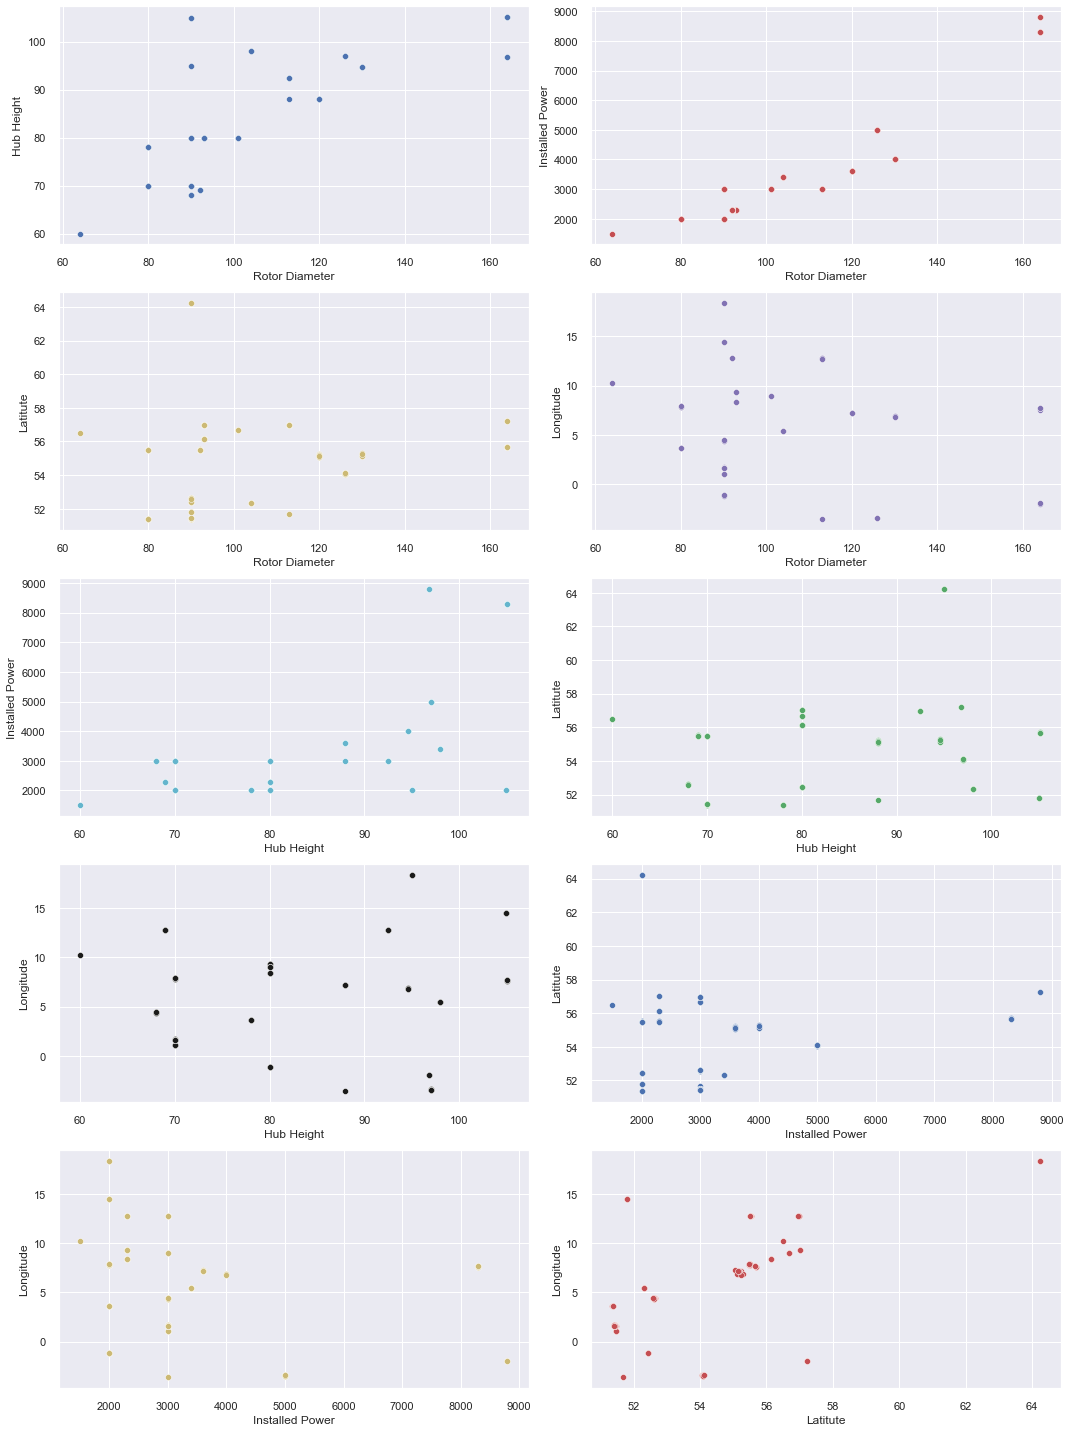

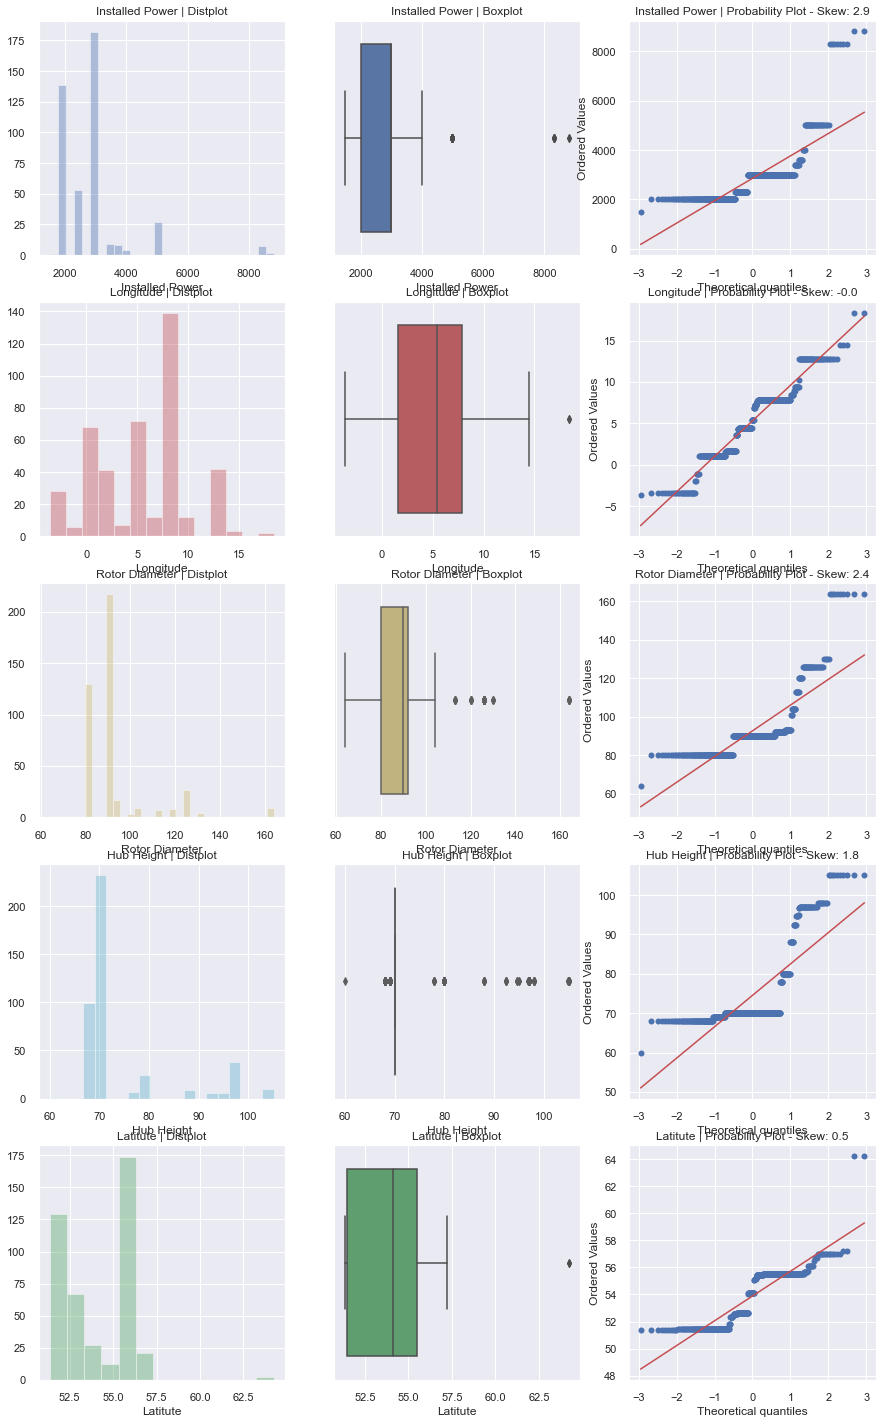

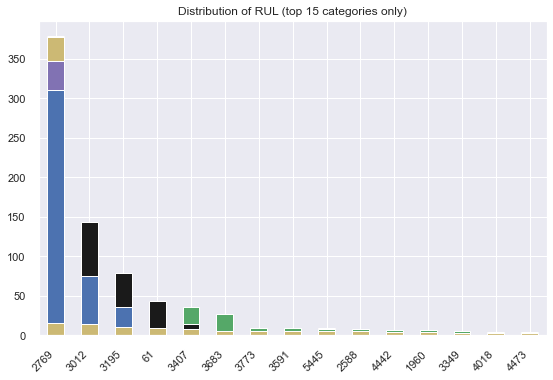

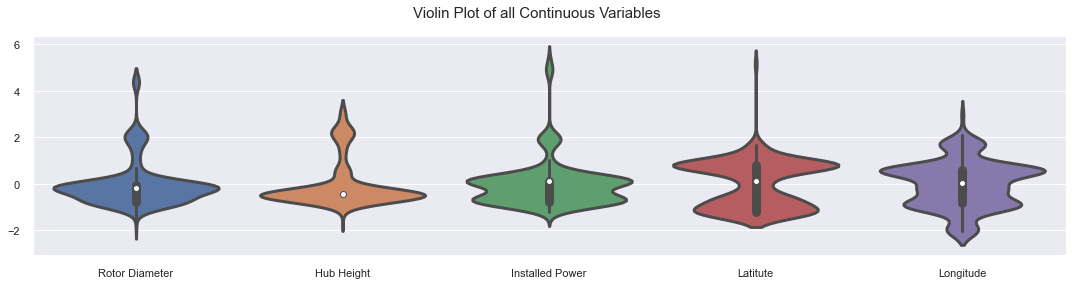

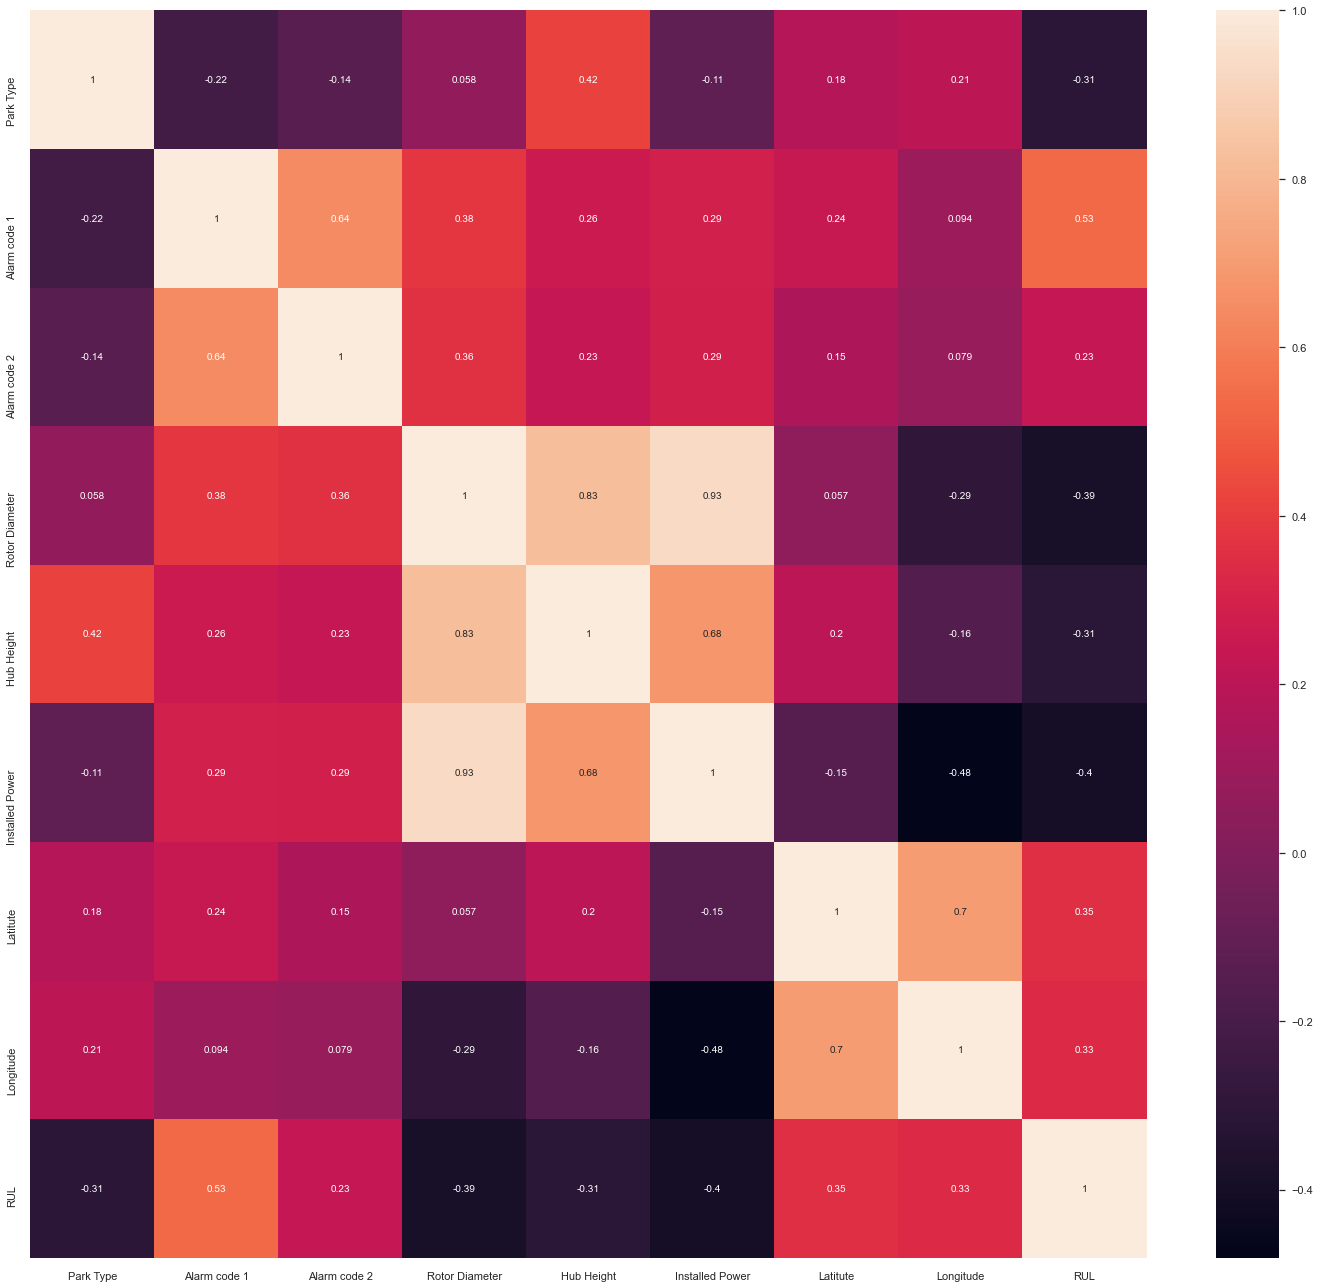

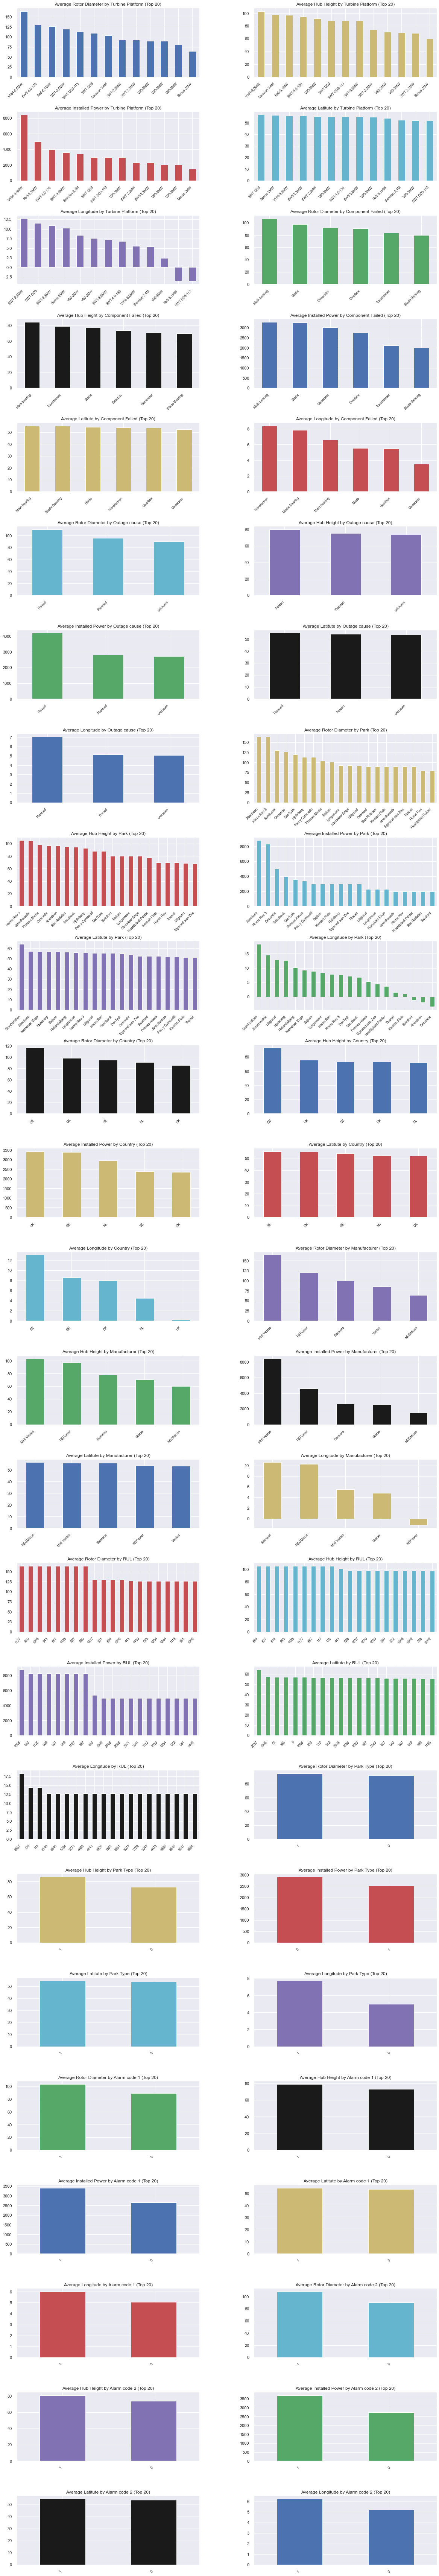

Time to run AutoViz (in seconds) = 9.979

 ###################### VISUALIZATION Completed ########################


In [98]:
# Loading our Data Into Autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('final.csv')

#### Let's Calculate the Average RUL by different Features

In [100]:
# Average RUL by Manufacturer
Avg_RUL_Manufacture= data_prepared.groupby('Manufacturer').mean()['RUL']
Avg_RUL_Manufacture

Manufacturer
MHI Vestas     896.111111
NEGMicon      2983.000000
REPower       1753.611111
Siemens       2294.853333
Vestas        2574.000000
Name: RUL, dtype: float64

In [101]:
# Average RUL by Country
Avg_RUL_Country = data_prepared.groupby('Country').mean()['RUL']
Avg_RUL_Country

Country
DK    3399.880795
GE    1247.666667
NL    1410.379747
SE    3220.931818
UK    1829.146853
Name: RUL, dtype: float64

In [102]:
# Average RUL by Component Failed
Avg_RUL_Component = data_prepared.groupby('Component Failed').mean()['RUL']
Avg_RUL_Component

Component Failed
Blade            3411.631579
Blade Bearing    5721.000000
Gearbox          2549.120000
Generator        1996.137500
Main bearing     1269.023256
Transformer      4129.583333
Name: RUL, dtype: float64

In [103]:
# Importing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [104]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
data_prepared['Park Type'] = labelencoder.fit_transform(data_prepared['Park Type'])
data_prepared

,Park Type,Turbine Platform,Turbine,Component Failed,Outage cause,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Park,Country,Manufacturer,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,RUL
0,1,V90-2MW,GJW001,Gearbox,unknown,2005-02-08,2005-06-05,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.789594,14.476311,117
1,1,V90-2MW,GJW001,Transformer,unknown,2005-02-08,2006-04-27,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.789594,14.476311,443
2,1,V90-2MW,GJW002,Transformer,unknown,2005-12-31,2006-05-10,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.791223,14.481372,130
3,0,V90-3MW,NEZ006,Generator,unknown,2006-01-01,2008-02-09,0,0,Egmond aan Zee,NL,Vestas,90.0,68.0,3000.0,52.600806,4.403694,769
4,0,V90-3MW,NEZ007,Generator,unknown,2006-01-01,2008-02-10,0,0,Egmond aan Zee,NL,Vestas,90.0,68.0,3000.0,52.605306,4.397472,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,"SWT-3,6MW",GDT015,Gearbox,Forced,2014-01-01,2020-11-26,1,1,DanTysk,GE,Siemens,120.0,88.0,3600.0,55.176795,7.180400,2521
445,0,"SWT-3,6MW",GDT071,Generator,Forced,2014-01-01,2020-11-27,1,1,DanTysk,GE,Siemens,120.0,88.0,3600.0,55.145877,7.187002,2522
446,0,V90-3MW,UTHB09,Generator,Forced,2010-01-01,2020-12-05,1,1,Thanet,UK,Vestas,90.0,70.0,3000.0,51.421371,1.619242,3991
447,0,"V164-8,0MW",WH3F07,Gearbox,Forced,2018-01-01,2021-01-30,1,1,Horns Rev 3,DK,MHI Vestas,164.0,105.1,8300.0,55.668330,7.694160,1125


In [105]:
data_prepared['Outage cause'].value_counts()

unknown    347
Planned     48
Forced      37
Name: Outage cause, dtype: int64

In [106]:
data_prepared.columns

Index(['Park Type', 'Turbine Platform', 'Turbine', 'Component Failed',
       'Outage cause', 'Component Commisioning Date',
       'Component Exchange Date', 'Alarm code 1', 'Alarm code 2', 'Park',
       'Country', 'Manufacturer', 'Rotor Diameter', 'Hub Height',
       'Installed Power', 'Latitute', 'Longitude', 'RUL'],
      dtype='object')

In [107]:
# Creating heatmap
corr = data_prepared.corr()
corr.shape

(9, 9)

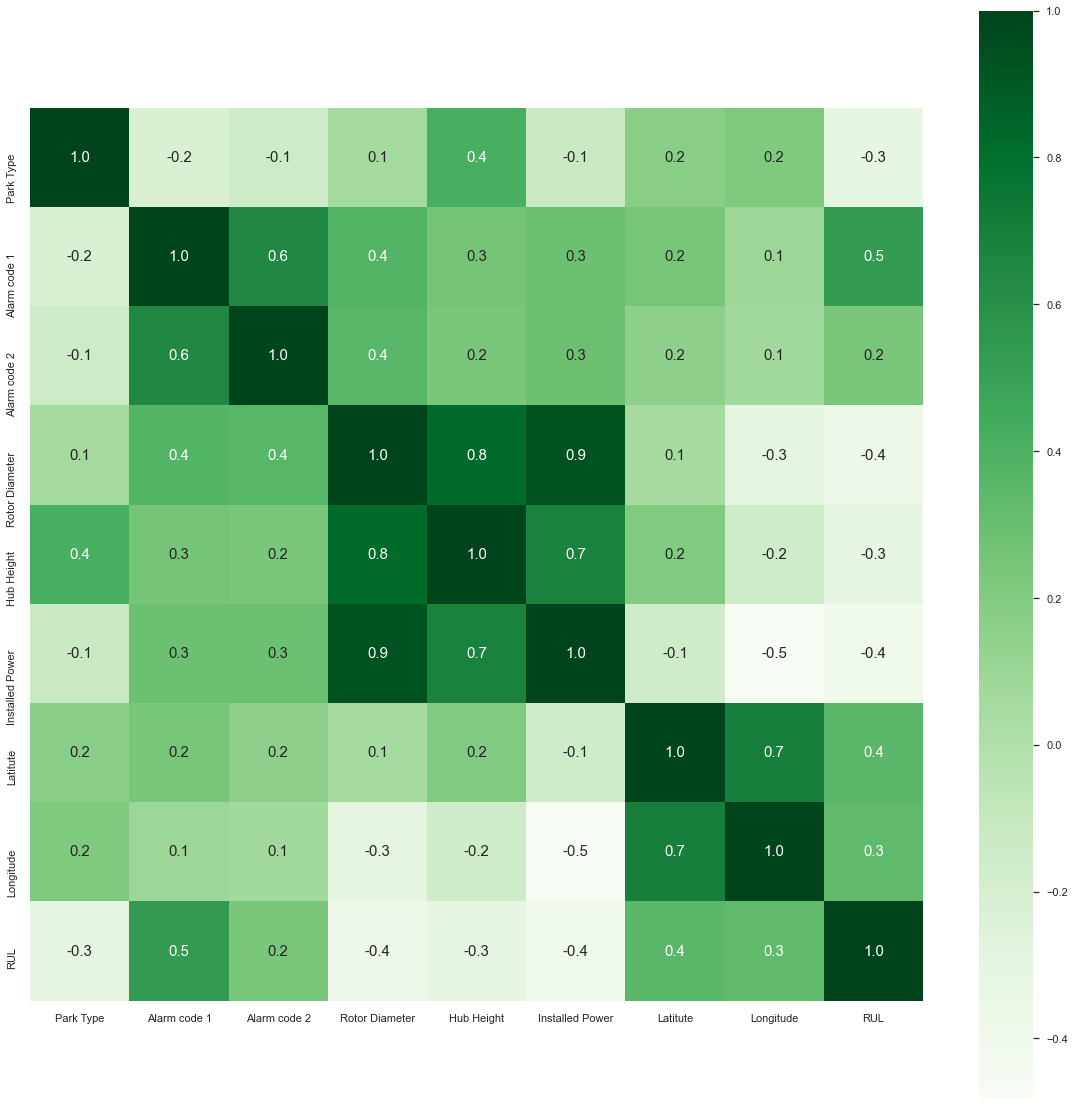

In [108]:
# Plotting Heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

In [109]:
data_prepared.columns

Index(['Park Type', 'Turbine Platform', 'Turbine', 'Component Failed',
       'Outage cause', 'Component Commisioning Date',
       'Component Exchange Date', 'Alarm code 1', 'Alarm code 2', 'Park',
       'Country', 'Manufacturer', 'Rotor Diameter', 'Hub Height',
       'Installed Power', 'Latitute', 'Longitude', 'RUL'],
      dtype='object')

In [112]:
data_prepared

,Park Type,Turbine Platform,Turbine,Component Failed,Outage cause,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Park,Country,Manufacturer,Rotor Diameter,Hub Height,Installed Power,Latitute,Longitude,RUL
0,1,V90-2MW,GJW001,Gearbox,unknown,2005-02-08,2005-06-05,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.789594,14.476311,117
1,1,V90-2MW,GJW001,Transformer,unknown,2005-02-08,2006-04-27,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.789594,14.476311,443
2,1,V90-2MW,GJW002,Transformer,unknown,2005-12-31,2006-05-10,0,0,Jänschwalde,GE,Vestas,90.0,105.0,2000.0,51.791223,14.481372,130
3,0,V90-3MW,NEZ006,Generator,unknown,2006-01-01,2008-02-09,0,0,Egmond aan Zee,NL,Vestas,90.0,68.0,3000.0,52.600806,4.403694,769
4,0,V90-3MW,NEZ007,Generator,unknown,2006-01-01,2008-02-10,0,0,Egmond aan Zee,NL,Vestas,90.0,68.0,3000.0,52.605306,4.397472,770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0,"SWT-3,6MW",GDT015,Gearbox,Forced,2014-01-01,2020-11-26,1,1,DanTysk,GE,Siemens,120.0,88.0,3600.0,55.176795,7.180400,2521
445,0,"SWT-3,6MW",GDT071,Generator,Forced,2014-01-01,2020-11-27,1,1,DanTysk,GE,Siemens,120.0,88.0,3600.0,55.145877,7.187002,2522
446,0,V90-3MW,UTHB09,Generator,Forced,2010-01-01,2020-12-05,1,1,Thanet,UK,Vestas,90.0,70.0,3000.0,51.421371,1.619242,3991
447,0,"V164-8,0MW",WH3F07,Gearbox,Forced,2018-01-01,2021-01-30,1,1,Horns Rev 3,DK,MHI Vestas,164.0,105.1,8300.0,55.668330,7.694160,1125


In [113]:
# Creating dummies for out categorical columns
df=pd.get_dummies(data=data_prepared, columns=['Turbine Platform',
       'Component Failed', 'Outage cause','Park',
       'Country', 'Manufacturer'])

In [114]:
df.head()

,Park Type,Turbine,Component Commisioning Date,Component Exchange Date,Alarm code 1,Alarm code 2,Rotor Diameter,Hub Height,Installed Power,Latitute,...,Country_DK,Country_GE,Country_NL,Country_SE,Country_UK,Manufacturer_MHI Vestas,Manufacturer_NEGMicon,Manufacturer_REPower,Manufacturer_Siemens,Manufacturer_Vestas
0,1,GJW001,2005-02-08,2005-06-05,0,0,90.0,105.0,2000.0,51.789594,...,0,1,0,0,0,0,0,0,0,1
1,1,GJW001,2005-02-08,2006-04-27,0,0,90.0,105.0,2000.0,51.789594,...,0,1,0,0,0,0,0,0,0,1
2,1,GJW002,2005-12-31,2006-05-10,0,0,90.0,105.0,2000.0,51.791223,...,0,1,0,0,0,0,0,0,0,1
3,0,NEZ006,2006-01-01,2008-02-09,0,0,90.0,68.0,3000.0,52.600806,...,0,0,1,0,0,0,0,0,0,1
4,0,NEZ007,2006-01-01,2008-02-10,0,0,90.0,68.0,3000.0,52.605306,...,0,0,1,0,0,0,0,0,0,1


In [231]:
# Creating our train and test data
X = df.drop(['Component Commisioning Date','Component Exchange Date','RUL','Turbine',], axis = 1)
y = df.RUL

In [232]:
# It's important to standardise data before passing it to Regressor
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
# fit and transform the data
X = scaler.fit_transform(X)

In [233]:
X

array([[ 2.67412479, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [ 2.67412479, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [ 2.67412479, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       ...,
       [-0.37395413,  1.70055635,  2.64575131, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [-0.37395413,  1.70055635,  2.64575131, ..., -0.30151134,
        -0.45834925, -1.60319928],
       [-0.37395413,  1.70055635,  2.64575131, ..., -0.30151134,
        -0.45834925, -1.60319928]])

In [238]:
# Importing train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 33)

## Step 6: Model Building

In [239]:
# creating data for our model
new_df = df.drop(['Component Commisioning Date','Component Exchange Date','RUL','Turbine',], axis = 1)

In [240]:
from sklearn.preprocessing import StandardScaler
std_df = StandardScaler().fit_transform(new_df) # normalizing the data 

In [241]:
std_df.shape

(432, 61)

In [242]:
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # 

pca = PCA(n_components=13)
principalComponents = pca.fit_transform(std_df)

With PCA, we are trying to compute new characteristics (principal components) that compacts the information into certain dimensions.

Behind the scenes, the algorithm will first get the covariance matrix. Then, it will calculate the Principal Components (PCs). If our datapoints have 13 variables, then we will get 13 PCs. A PC is a linear combination of the variables such that they have no correlation with each other (they are orthogonal) and that most of the information is squeezed into the first few PCs. In this case, “information” is the variance.

In our case, here is the variance captured in each principal component:

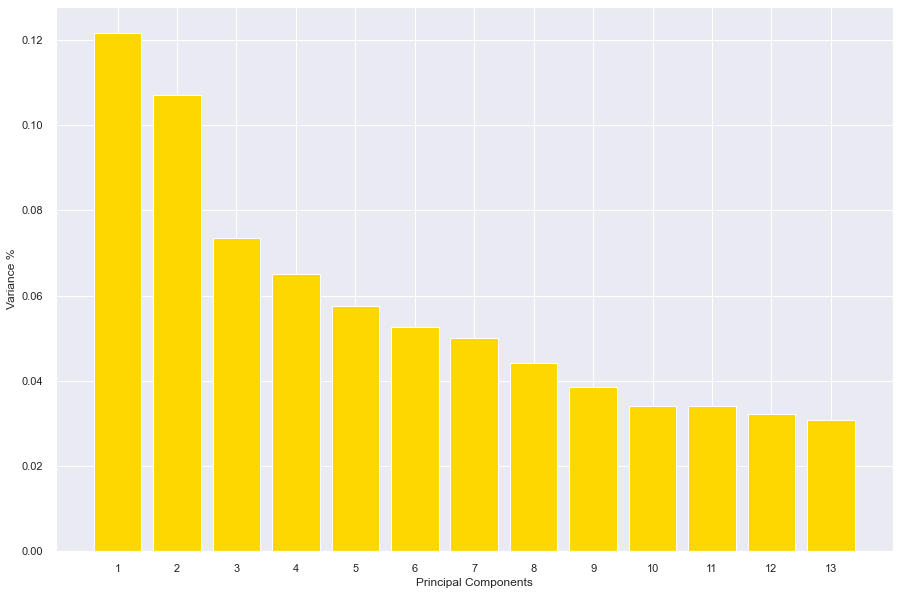

In [243]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

Most of the variance is put in the first component. What is left is put in component 2, then component 3, etc.
Now that we have the intuition, let’s proceed with the implementation. From the variance plot, there wasn’t much variance contained in the third component, so let’s just plot the first 2.

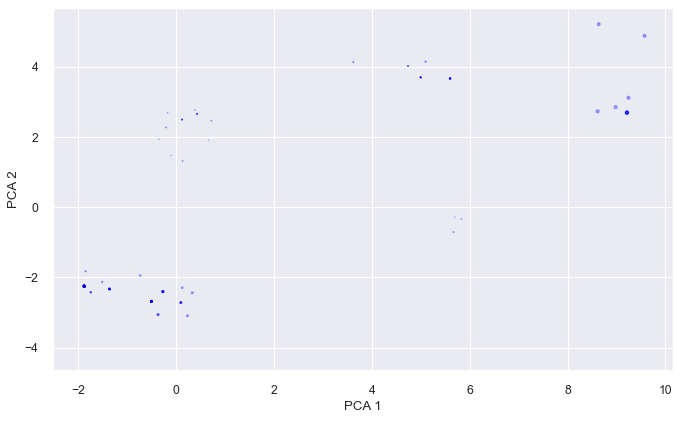

In [244]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

plt.scatter(PCA_components[0], PCA_components[1],PCA_components[2], alpha=.3, color='blue')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Awesome, PCA has helped us to reduce the dimension of our data and we were able to make this nice plot. Even more interesting is that it looks like there are clusters present.

To make the clusters more apparent, let’s use the K-means clustering algorithm to color-code them.

We first need to determine how many clusters we want. 

### Elbow Method

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

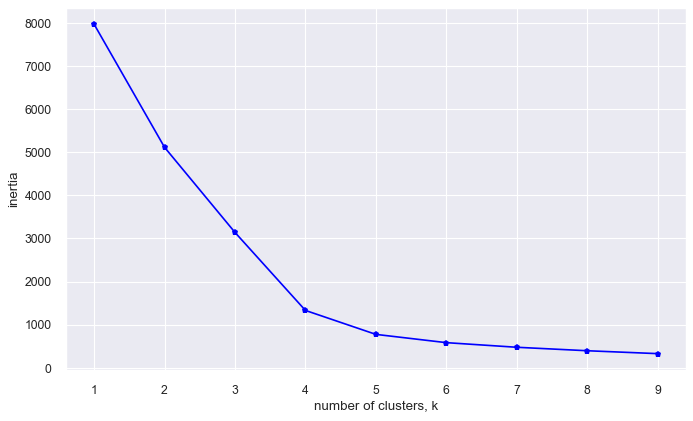

In [245]:
figure(figsize=(10, 6), dpi=80)

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,10):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,10), inertias, '-p', color='blue')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
# plt.xticks(ks)
plt.show()

Typically, we look at these inertia plots to find the elbow point. In our case, it looks like the elbow occurs with 4 clusters, so we will proceed with that.



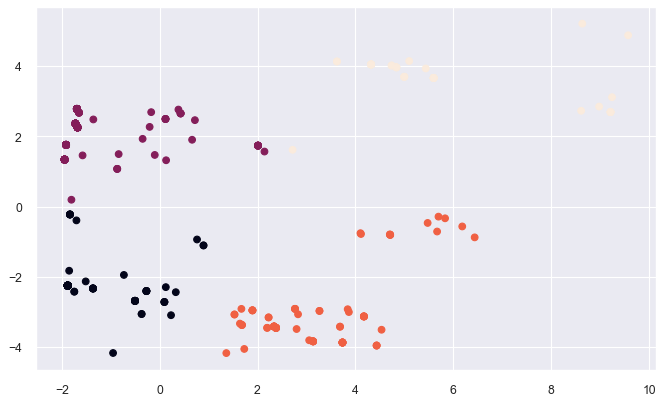

In [246]:

model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
figure(figsize=(10, 6), dpi=80)
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()


Looks great! 

We have a beautiful cluster Visualisation

### Decision Tree

In [247]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Fitting the decision tree with default hyperparameters
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

In [248]:
# Calculating Accuracy
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test, pred)

In [249]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.2476269891368068

##### Clearly Decision Tree is the worst performer lets try to do hyper parameter tuning to improve accuracy

In [181]:
# Create the parameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": range(5, 15, 5),
"min_samples_leaf": range(50, 150, 50),
"min_samples_split": range(50, 150, 50),
"criterion": ['gini', 'entropy']}
n_folds = 5
# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree,
param_grid = param_grid,
cv = n_folds,
verbose = 1)
# Fit the grid Search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [182]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy: ", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy:  0.06300546448087431
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [183]:
# model with optimal hyperparameter
clf_gini = DecisionTreeClassifier(criterion='gini',
random_state=100,
max_depth=5,
min_samples_leaf=50,
min_samples_split=50)
clf_gini.fit(X_train,y_train)
pred = clf_gini.predict(X_test)

In [184]:
#accuracy_score(y_test, pred)

In [185]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

-0.347317528706629

##### Decision Tree has no scope of improvement let's try a better model like KNeighborsRegressor

### KNeighborsRegressor

In [186]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [187]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [188]:
# Searching for the best value of n_neighbors
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg_cv= GridSearchCV(knn_reg,param_grid,cv=5)
knn_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [189]:
# Best score by GridSearchCV
knn_reg_cv.best_score_

0.8175826070511321

In [190]:
# Best value for n_neighbors
knn_reg_cv.best_params_

{'n_neighbors': 1}

In [191]:
# Using the best parameters to train the model
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 1)
knn_reg.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=1)

In [192]:
# Calculating Accuracy
final_train_accuracy = knn_reg.score(X_train, y_train)
    
final_test_accuracy = knn_reg.score(X_test, y_test)

In [212]:
X_test

array([[-0.37395413,  1.70055635,  2.64575131, ...,  3.31662479,
        -0.45834925, -1.60319928],
       [-0.37395413, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [-0.37395413,  1.70055635,  2.64575131, ..., -0.30151134,
         2.18174242, -1.60319928],
       ...,
       [-0.37395413,  1.70055635, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [ 2.67412479, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277],
       [-0.37395413, -0.58804285, -0.37796447, ..., -0.30151134,
        -0.45834925,  0.62375277]])

In [193]:
# Train Accuracy
final_train_accuracy

0.9840498346903291

In [197]:
# Test Accuracy
final_test_accuracy


0.7957607051554341

In [198]:
#pred = knn_reg.predict(X_test)
#accuracy_score(y_test, pred)

In [200]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.7957607051554341

##### Our model has done a really good job with an R2_score  of 79%, Let's also calculate other metrics

In [201]:
# Calculating Mean absolute error
from sklearn.metrics import mean_absolute_error

pred = knn_reg.predict(X_test)
mean_absolute_error(y_test, pred)

500.26153846153846

In [202]:
# Calculating Mean squared error
from sklearn.metrics import mean_squared_error

mean_squared_error = mean_squared_error(y_test, pred)
mean_squared_error

600625.0461538462

In [203]:
# Calculating Square Root of Mean squared error
from math import sqrt

root_mean_squared_error = sqrt(mean_squared_error)
root_mean_squared_error

775.0000297766744

In [204]:
# Calculating r2_score
from sklearn.metrics import r2_score
score = r2_score(y_test, pred)
score

0.7957607051554341

In [205]:
# Creating our resulting Data Frame with Actual and Predicted Values
Result=pd.DataFrame(data={'Predictions': y_test, 'Actual': pred})

In [206]:
# Calculating Errors done by our Model
Result['Error']=abs(Result['Actual']-Result['Predictions'])

In [207]:
Result

,Predictions,Actual,Error
432,3513,2686.0,827.0
149,1966,1370.0,596.0
391,4328,4328.0,0.0
245,4018,4442.0,424.0
447,1125,889.0,236.0
...,...,...,...
178,3195,2769.0,426.0
407,6389,6358.0,31.0
327,5234,5274.0,40.0
339,2557,2557.0,0.0


In [208]:
# We now know the average RUL 
Average_RUL = sum(Result['Error'])/130
Average_RUL

500.26153846153846

In [209]:
# Let's plot our findings for 20 Rows
Result['Predictions'][:20]

432    3513
149    1966
391    4328
245    4018
447    1125
359    1256
338    1096
275    1732
50     1185
0       117
101    1391
289     895
417    5445
134    3012
230     716
305     365
229     704
302     210
64     1308
98     1381
Name: Predictions, dtype: int64

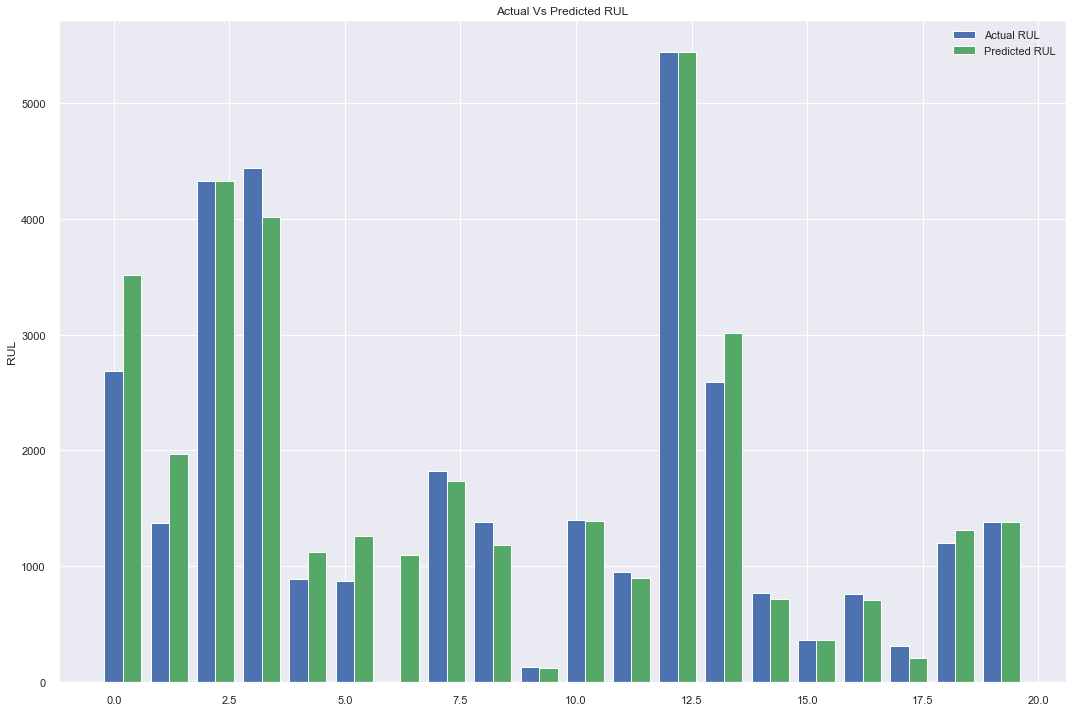

In [210]:
# data to plot
#figure(figsize=(10, 6), dpi=80)
#import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

# creating plot
fig, ax = plt.subplots()
bar_width = 0.40
X = np.arange(20)

p1 = plt.bar(X, Result['Actual'][:20], bar_width, color='b',
label='Actual RUL')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, Result['Predictions'][:20], bar_width,
color='g',
label='Predicted RUL')

plt.ylabel('RUL')
plt.title('Actual Vs Predicted RUL')
plt.legend()

plt.tight_layout()
plt.show()

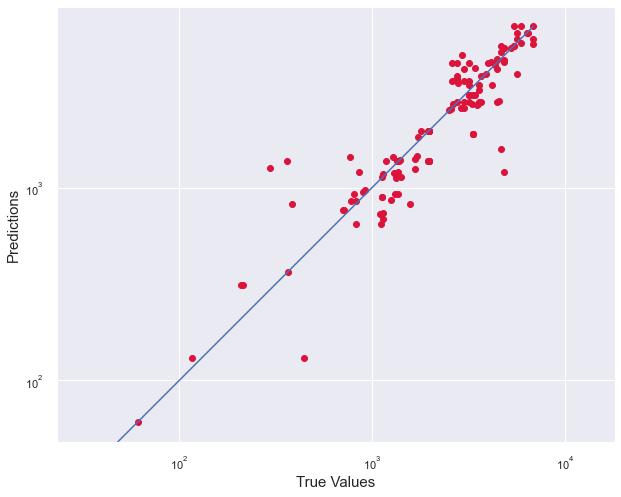

In [211]:
# Creating a scatter plot to see how our predicted data is different from our True Values

plt.figure(figsize=(10,8))
plt.scatter(y_test, pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### CONCLUSION

KNN regressor fits with 79% R2_score, which could correctly predict RUL values for most of the Data.

References:
1.	https://bmachsan.medium.com/remaining-useful-life-predictive-maintenance-ccdf40580216
2.	https://en.wikipedia.org/wiki/Project_commissioning
3.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
4.	https://andrewmourcos.github.io/blog/2019/06/06/PCA.html
5.	https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
